In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Graphical Representation

In [2]:
original_data = pd.read_excel(r"C:\Users\Administrator\Desktop\New project\Bank_Personal_Loan_Modelling gr.xlsx")
original_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
original_data=original_data.drop('ID',axis=1)
original_data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


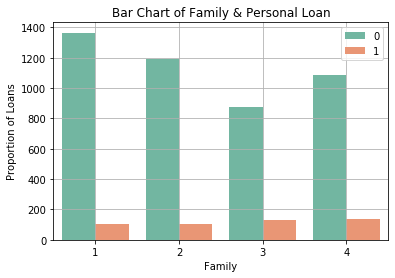

In [6]:
#Bar Chart of Family & Personal Loan
sns.countplot(x='Family',data=original_data,hue='Personal Loan',palette='Set2')
plt.title('Bar Chart of Family & Personal Loan')
plt.xlabel('Family')
plt.ylabel('Proportion of Loans')
plt.grid()
plt.legend(loc=1)

Conclusion :
Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

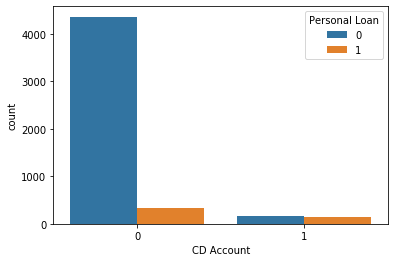

In [7]:
#barplot for CD Account and Personal loan
sns.countplot(x='CD Account',data=original_data,hue='Personal Loan')

Conclusion :
Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

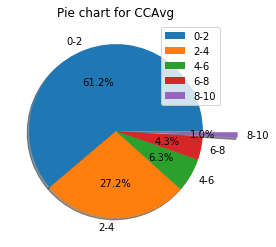

In [8]:
#Pie chart for CCAvg
labels =['0-2','2-4','4-6','6-8','8-10']
x = [3059,1358,316,216,51]
explode = (0,0,0,0,0.4)  
plt.pie(x,explode=explode, labels=labels,colors=None,shadow= True,autopct='%1.1f%%')
plt.legend(loc=3)
plt.grid()
plt.title("Pie chart for CCAvg")
plt.legend(loc=1)

conclusion :
Maximum Average spending on credit cards per month by borrowrs lies between 0 and 2000$.

In [9]:
quant_df =original_data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()

In [10]:
quant_df.corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


In [11]:
quant_df.corr()['Personal Loan'][1:]

Age        -0.007726
Income      0.502462
CCAvg       0.366889
Mortgage    0.142095
Name: Personal Loan, dtype: float64

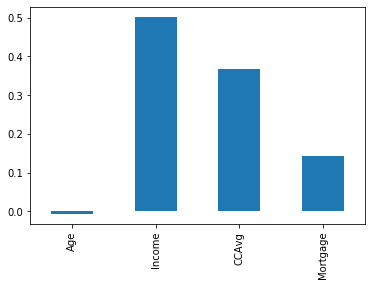

In [12]:
quant_df.corr()['Personal Loan'][1:].plot.bar();

'Age' and 'Mortgage' both has very low cor.coef with Personal Loan. We may say that only 'Income' and 'CCAvg' has association with 'Personal Loan'

# Binary

In [13]:
bin_df = original_data[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].copy()

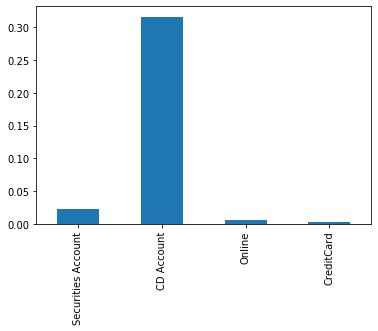

In [14]:
bin_df.corr()['Personal Loan'][1:].plot.bar();

'CD Account' - the only one variable with moderate association

In [15]:
original_data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Classifiers

In [5]:
#Classify data
data = pd.read_csv(r"C:\Users\Administrator\Desktop\New project\classification data for loan.csv")
data

,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,0,1,0,0,0
1,34,3,1.5,1,0,1,0,0,0
2,11,1,1.0,1,0,0,0,0,0
3,100,1,2.7,2,0,0,0,0,0
4,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,1,0
4996,15,4,0.4,1,0,0,0,1,0
4997,24,2,0.3,3,0,0,0,0,0
4998,49,3,0.5,2,0,0,0,1,0


In [6]:
data.describe()

,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,73.774200,2.396400,1.937938,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000
std,46.033729,1.147663,1.747659,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637
min,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,98.000000,3.000000,2.500000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,224.000000,4.000000,10.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
data.isnull().sum()

Income                0
Family                0
CCAvg                 0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#Check the structure of dataset
data.dtypes

Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

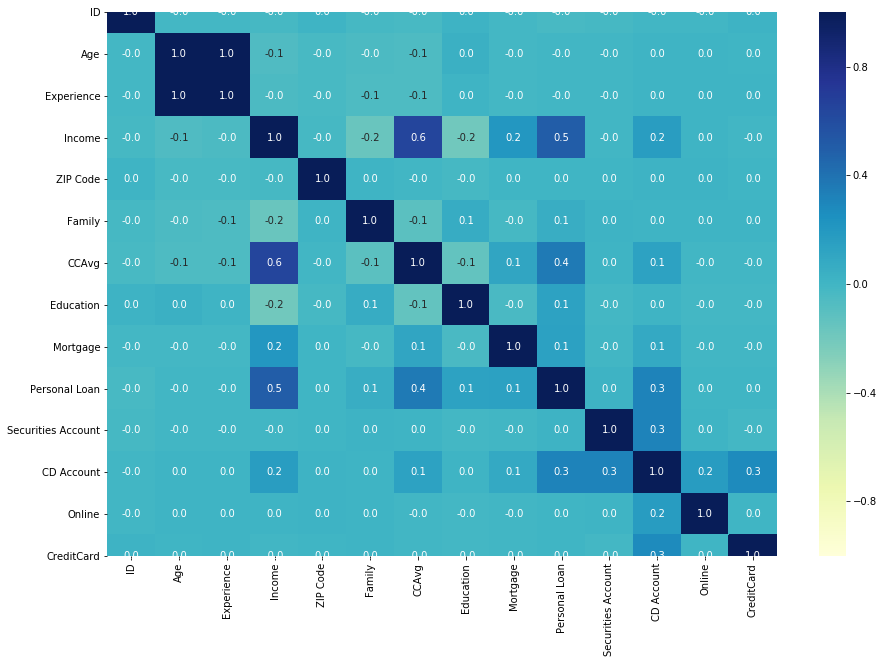

In [10]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(original_data.corr(),vmin=-1,vmax=1,fmt='.1f',cmap='YlGnBu',annot=True)

In [4]:
#Random forest classifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(6997)
target = data['Personal Loan']
features = data.drop('Personal Loan', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, test_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9833333333333333

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

[[1354    6]
 [  19  121]]


Text(0.5, 1, 'Random Forest Classifier\nAccuracy:0.98')

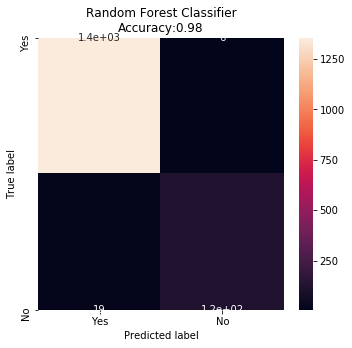

In [9]:
cm = confusion_matrix(y_test, test_pred)

print(cm)

# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True)


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Random Forest Classifier\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,test_pred)))


In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1360
           1       0.95      0.86      0.91       140

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

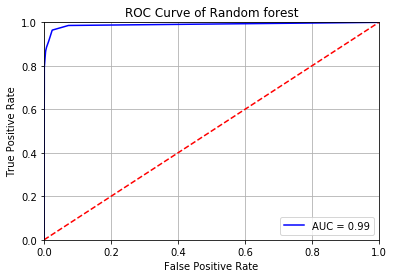

In [13]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random forest')
plt.grid()
plt.show()

In [ ]:
#KNN classifier

In [14]:
##Applying Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features, target)
y_pred=knn.predict(X_test)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(features, target,test_size=0.3,random_state=4)

[[1260   92]
 [ 139    9]]


Text(0.5, 1, 'Knn classifier\nAccuracy:0.85')

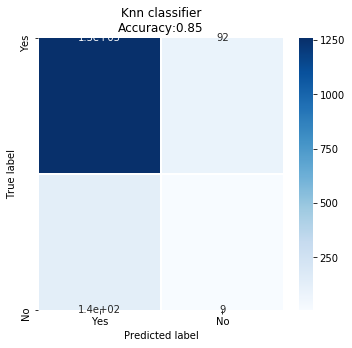

In [17]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True,cmap='Blues',linewidth=0.25)


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Knn classifier\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)))


In [18]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1352
           1       0.07      0.06      0.07       148

    accuracy                           0.83      1500
   macro avg       0.48      0.49      0.49      1500
weighted avg       0.82      0.83      0.82      1500



In [19]:
from sklearn.metrics import roc_curve

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
from sklearn.metrics import auc

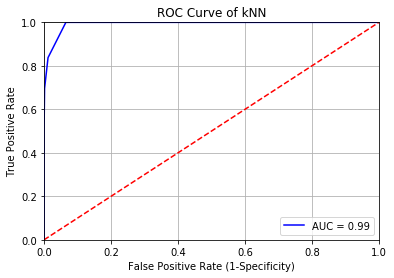

In [22]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.title('ROC Curve of kNN')
plt.grid()
plt.show()

In [ ]:
#Naives bayes classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
X_train,X_test,y_train,y_test=train_test_split(features, target,test_size=0.3,random_state=4)

In [25]:
NB=GaussianNB()

In [26]:
NB.fit(features, target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred=NB.predict(X_test)

In [28]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1253   99]
 [  59   89]]


[[1253   99]
 [  59   89]]


Text(0.5, 1, 'Naive Bayes classifier\nAccuracy:0.89')

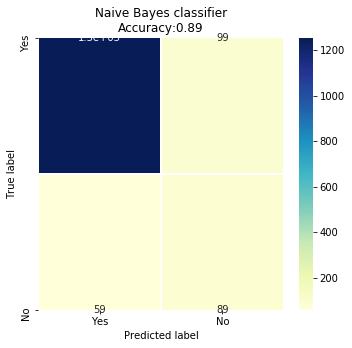

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True,cmap='YlGnBu',linewidth=0.25)


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes classifier\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)))


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1352
           1       0.47      0.60      0.53       148

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.74      1500
weighted avg       0.91      0.89      0.90      1500



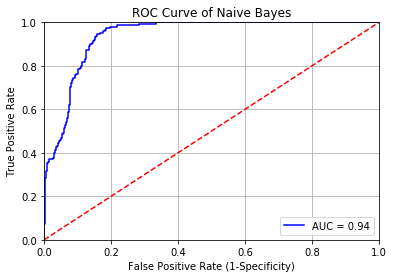

In [31]:
y_scores = NB.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.title('ROC Curve of Naive Bayes')
plt.grid()
plt.show()

In [151]:
#ann classifier

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
X_train,X_test,y_train,y_test=train_test_split(features, target,test_size=0.3)

In [34]:
Ann=MLPClassifier()

In [35]:
Ann.fit(features,target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [70]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1190  165]
 [ 122   23]]


[[1190  165]
 [ 122   23]]


Text(0.5, 1, 'ANN Classifier\nAccuracy:0.81')

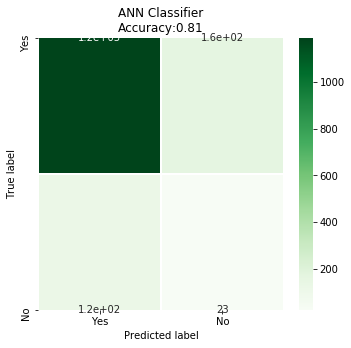

In [36]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True,cmap='Greens',linewidth=0.25)


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('ANN Classifier\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)))


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1355
           1       0.12      0.16      0.14       145

    accuracy                           0.81      1500
   macro avg       0.51      0.52      0.52      1500
weighted avg       0.83      0.81      0.82      1500



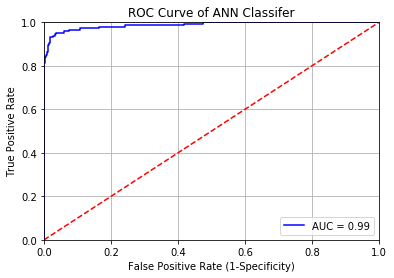

In [38]:
y_scores = Ann.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.title('ROC Curve of ANN Classifer')
plt.grid()
plt.show()

In [ ]:
#Decision tree classifier

In [39]:
from sklearn import tree

In [40]:
X_train,X_test,y_train,y_test=train_test_split(features, target ,test_size=0.3)

In [41]:
DT=tree.DecisionTreeClassifier()

In [42]:
DT.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_pred=DT.predict(X_test)

In [44]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1353    0]
 [   0  147]]


[[1353    0]
 [   0  147]]


Text(0.5, 1, 'Decision tree Classifier\nAccuracy:1.00')

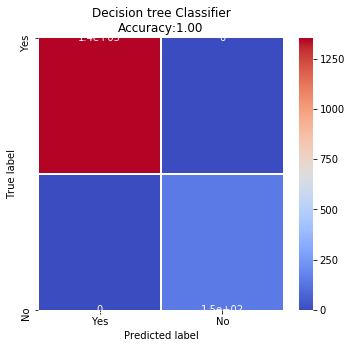

In [45]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True,cmap='coolwarm',linewidth=0.25)


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Decision tree Classifier\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)))


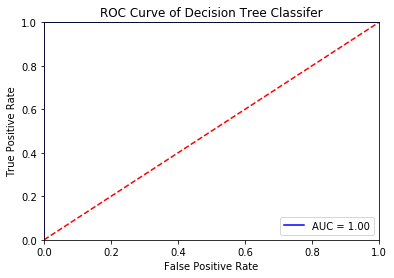

In [46]:
y_scores = DT.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree Classifer')
plt.show()

In [ ]:
#SVM

In [47]:
from sklearn import svm,datasets

In [48]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3)

In [237]:
SVM=svm.SVC(kernel='linear')

In [49]:
SVM=svm.SVC(probability=True)

In [51]:
SVM.fit(features,target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
y_pred=SVM.predict(X_test)

In [53]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1359    0]
 [  11  130]]


[[1359    0]
 [  11  130]]


Text(0.5, 1, 'SVM Classifier\nAccuracy:0.99')

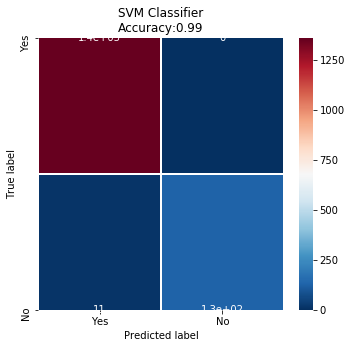

In [54]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True,cmap='RdBu_r',linewidth=0.25)



plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SVM Classifier\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)))

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1359
           1       1.00      0.92      0.96       141

    accuracy                           0.99      1500
   macro avg       1.00      0.96      0.98      1500
weighted avg       0.99      0.99      0.99      1500



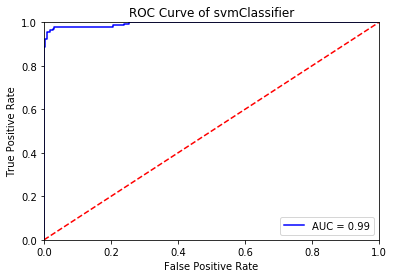

In [66]:
y_scores = SVM.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of svmClassifier')
plt.show()

In [ ]:
#logistic

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)

In [59]:
model= LogisticRegression()

In [60]:
model.fit(features,target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred=model.predict(X_test)

In [62]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1343   17]
 [  55   85]]


[[1343   17]
 [  55   85]]


Text(0.5, 1, 'Logistic regression\nAccuracy:0.95')

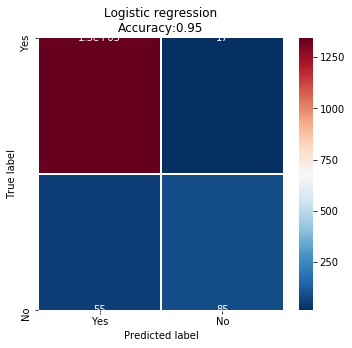

In [63]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Show confusion matrix in a separate window
cm_df=pd.DataFrame(cm,
                  index = ['Yes','No'],
                  columns = ['Yes','No'])
plt.figure(figsize=(5.5,5))
sns.heatmap(cm_df, annot=True,cmap='RdBu_r',linewidth=0.25)



plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic regression\nAccuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)))

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1360
           1       0.83      0.61      0.70       140

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



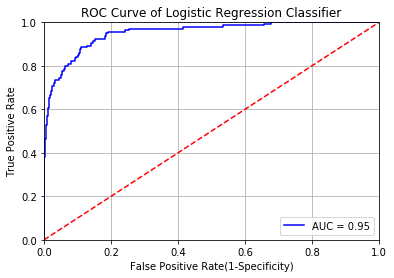

In [65]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve of Logistic Regression Classifier')
plt.grid()
plt.show()